In [5]:
import numpy as np
import mplleaflet as mpl
import matplotlib.pyplot as plt
from pymove import trajutils, maputils
from tqdm import tqdm_notebook as tqdm

In [6]:
import dask.dataframe as dd
#import modin.pandas as mp
import pandas as pd

# 1. Read and presentation of the data 

### 1.1 Read dataset

In [7]:
filename = '/Users/nickssonarrais/datasets/tnz/raw/tnz2019_05_599.csv.gz'
usecols=[0, 1, 2, 3]

In [9]:
names = ['id', 'datetime', 'lat', 'lon']
dtype = {'lat':'float32', 'lon':'float32'}
parse_dates= [1]
header=1

###### Read CSV

In [17]:
df = pd.read_csv(filename, names=names, dtype=dtype, nrows=50000, header=header, usecols=usecols, parse_dates=parse_dates)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
id          50000 non-null object
datetime    50000 non-null datetime64[ns]
lat         50000 non-null float32
lon         50000 non-null float32
dtypes: datetime64[ns](1), float32(2), object(1)
memory usage: 1.1+ MB


#### Sort Values

In [19]:
%%time
by = ['id', 'datetime']
df.sort_values(by, inplace=True)

CPU times: user 24.2 ms, sys: 4.11 ms, total: 28.3 ms
Wall time: 29.2 ms


In [20]:
#%%time
#trajutils.clean_duplicates(df, subset=by, return_idx=False)

## 1.2 Show Data

###### General information

In [21]:
trajutils.show_trajectories_info(df)


======================= INFORMATION ABOUT DATASET =======================

Number of Points: 50000

Number of IDs objects: 2

Start Date:2019-06-01 00:00:32     End Date:2019-06-30 23:59:18

Bounding Box:(-3.89488, -38.61248, -3.72492, -38.51148)





# 2. Show points

### plotting all data

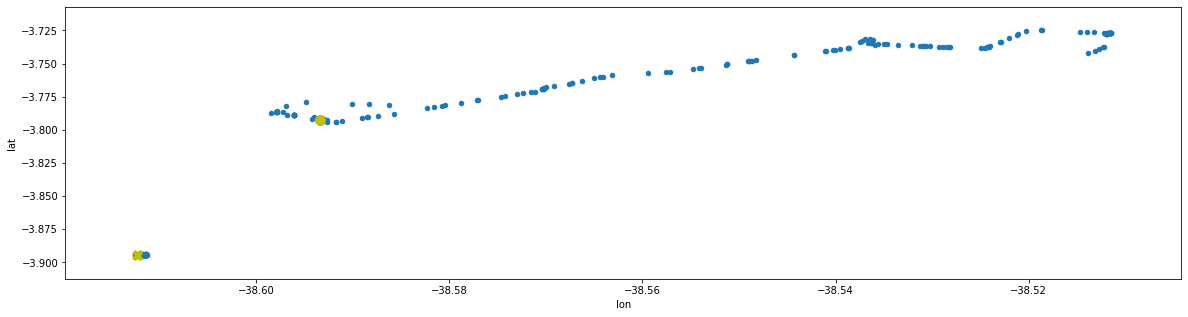

In [22]:
maputils.show_lat_lon_GPS(df, save_fig=False, figsize=(20,5), name='_show_lat_lon.png')

### Number of id for each date

Creating date features...
..Date features was created...


Creating or updating day of the week feature...

...the day of the week feature was created...


Creating or updating a feature for hour...

...Hour feature was created...


Creating or updating period feature
...early morning from 0H to 6H
...morning from 6H to 12H
...afternoon from 12H to 18H
...evening from 18H to 24H
...the period of day feature was created


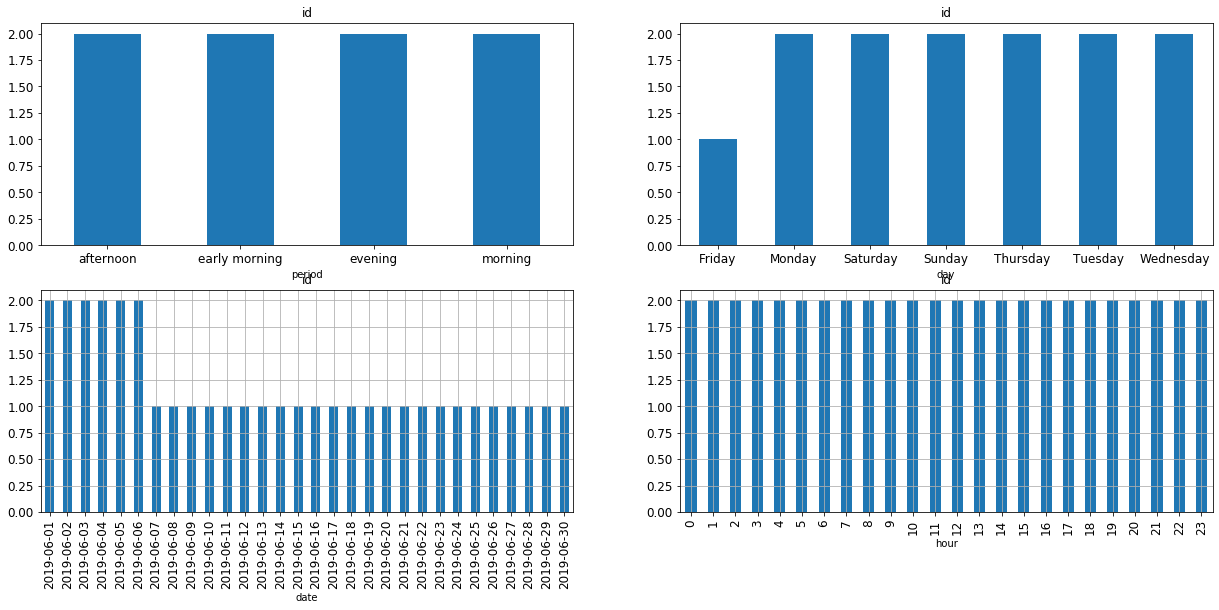

In [24]:
maputils.show_object_id_by_date(df, create_features=True, kind=['bar', 'bar', 'bar', 'bar'], figsize=(21, 9), low_memory=False)

In [25]:
del df['day']
del df['period']
del df['hour']  
del df['date']

In [26]:
df.head()

,id,datetime,lat,lon
0,M80001,2019-06-01 00:01:54,-3.79239,-38.593380
1,M80001,2019-06-01 00:02:54,-3.79237,-38.593361
2,M80001,2019-06-01 00:03:54,-3.79240,-38.593380
3,M80001,2019-06-01 00:04:54,-3.79244,-38.593380
4,M80001,2019-06-01 00:05:54,-3.79238,-38.593361


# 3. Create Features

In [27]:
%%time
trajutils.create_update_dist_time_speed_features(df)

Creating or updating distance, time and speed features in meters by seconds
...Sorting by id and datetime to increase performance
...Set id as index to a higher peformance
(50000/50000) 100% in 00:00:00.055 - estimated end in 00:00:00.000
...Reset index...

Total Time: 0.06 seconds
-----------------------------------------------------

CPU times: user 54.5 ms, sys: 8.68 ms, total: 63.2 ms
Wall time: 59.5 ms


In [29]:
df.describe()

,lat,lon,dist_to_prev,time_to_prev,speed_to_prev
count,50000.000000,50000.000000,49998.000000,49998.000000,49998.000000
mean,-3.807915,-38.596035,4.317820,61.160326,0.068065
std,0.037209,0.008076,62.633482,235.951176,0.583485
min,-3.894880,-38.612480,0.000000,27.000000,0.000000
25%,-3.792370,-38.593369,0.000000,60.000000,0.000000
50%,-3.792270,-38.593330,2.183512,60.000000,0.036392
75%,-3.792220,-38.593308,4.727092,60.000000,0.078785
max,-3.724920,-38.511478,11616.963923,52772.000000,106.042283


In [28]:
maputils.show_all_features(df, save_fig=True, name=file+"_show_all_features.png")

NameError: name 'file' is not defined

In [ ]:
df.info()

# 4. Save a csv file

In [ ]:
df.describe(percentiles=[0.75, 0.85, 0.95, 0.99]).to_csv(path_or_buf=file+'_describe.csv', float_format='%.5f', decimal=',')